# Nonlinear Advection Equation in 2D

We now explore numerical solutions to the vectorized advection equation in 2D

\begin{align}
  \frac{\partial \vec{u}}{\partial t} 
  + \left(\vec{u}\cdot\nabla\right)\vec{u} 
  = 0,
\end{align}

where $\vec{u}(x,y,t)$ is a two-component vector

\begin{align}
  \vec{u} =
  \left[\begin{array}{}
    u \\
    v
  \end{array}\right],
\end{align}

with $u=u(x,y,t)$ and $v=v(x,y,t)$. When written in component form, this yields the two coupled scalar equations

\begin{align}
  & \frac{\partial u}{\partial t}
  + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} 
  = 0
  \\
  & \frac{\partial v}{\partial t}
  + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} 
  = 0.
\end{align}

We solve this as before we using an upwind finite difference scheme in two spatial directions, which yields

\begin{align}
  & u^{n+1}_{i,j} = u^{n}_{i,j} 
  - \frac{\Delta{t}}{\Delta{x}}u^{n}_{i,j}\left(u^{n}_{i,j} - u^{n}_{i-1,j}\right)
  - \frac{\Delta{t}}{\Delta{y}}v^{n}_{i,j}\left(u^{n}_{i,j} - u^{n}_{i,j-1}\right)
  \\
  & v^{n+1}_{i,j} = v^{n}_{i,j} 
  - \frac{\Delta{t}}{\Delta{x}}u^{n}_{i,j}\left(v^{n}_{i,j} - v^{n}_{i-1,j}\right)
  - \frac{\Delta{t}}{\Delta{y}}v^{n}_{i,j}\left(v^{n}_{i,j} - v^{n}_{i,j-1}\right).
\end{align}

If we use a uniform grid with $h\equiv \Delta{x} = \Delta{y}$, then these simplify to

\begin{align}
  u^{n+1}_{i,j} = u^{n}_{i,j} 
  - \frac{\Delta{t}}{h}\left[u^{n}_{i,j}\left(u^{n}_{i,j} - u^{n}_{i-1,j}\right)
  + v^{n}_{i,j}\left(u^{n}_{i,j} - u^{n}_{i,j-1}\right)\right]
  \\
  v^{n+1}_{i,j} = v^{n}_{i,j} 
  - \frac{\Delta{t}}{h}\left[u^{n}_{i,j}\left(v^{n}_{i,j} - v^{n}_{i-1,j}\right)
  + v^{n}_{i,j}\left(v^{n}_{i,j} - v^{n}_{i,j-1}\right)\right].
\end{align}

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
# setup spatial grid (vertex-centered)
Lx = 2.0         # size of physical grid in x direction
Ly = 2.0         # size of physical grid in y direction
nx = 61          # total number of grid points in x direction
ny = 61          # total number of grid points in y direction
dx = Lx/(nx-1)   # grid spacing in x direction
dy = Ly/(ny-1)   # grid spacing in y direction
x = np.linspace(0, Lx, nx) # x grid
y = np.linspace(0, Ly, ny) # y grid
print('x grid spacing is',dx)
print('y grid spacing is',dy)

# setup time grid
sigma = 0.2
dt = sigma*dx   # size of timesteps
nt = 100        # total number of timesteps
print('time stepsize is',dt)

x grid spacing is 0.03333333333333333
y grid spacing is 0.03333333333333333
time stepsize is 0.006666666666666667


In [3]:
# initialize grid functions
u = np.zeros((nx,ny)) # grid function at the current step
v = np.zeros((nx,ny)) # grid function at the current step
un = np.ones((nx,ny)) # grid function at the previous step
vn = np.ones((nx,ny)) # grid function at the previous step

# initial data
ax = int(0.25*Lx/dx)  #location of the first jump in x
bx = int(0.50*Lx/dx)  #location of the second jump in x
ay = int(0.25*Ly/dy)  #location of the first jump in y
by = int(0.50*Ly/dy)  #location of the second jump in y
# for u
u[  :  ,   :ay] = 1.  #lower strip
u[  :  , by:  ] = 1.  #upper strip
u[  :ax, ay:by] = 1.  #left block
u[bx:  , ay:by] = 1.  #right block
u[ax:bx, ay:by] = 2.  #central block
umax0 = np.amax(u)    #max value (for plotting)
# for v
v[  :  ,   :ay] = 1.  #lower strip
v[  :  , by:  ] = 1.  #upper strip
v[  :ax, ay:by] = 1.  #left block
v[bx:  , ay:by] = 1.  #right block
v[ax:bx, ay:by] = 2.  #central block
vmax0 = np.amax(v)    #max value (for plotting)

<IPython.core.display.Javascript object>


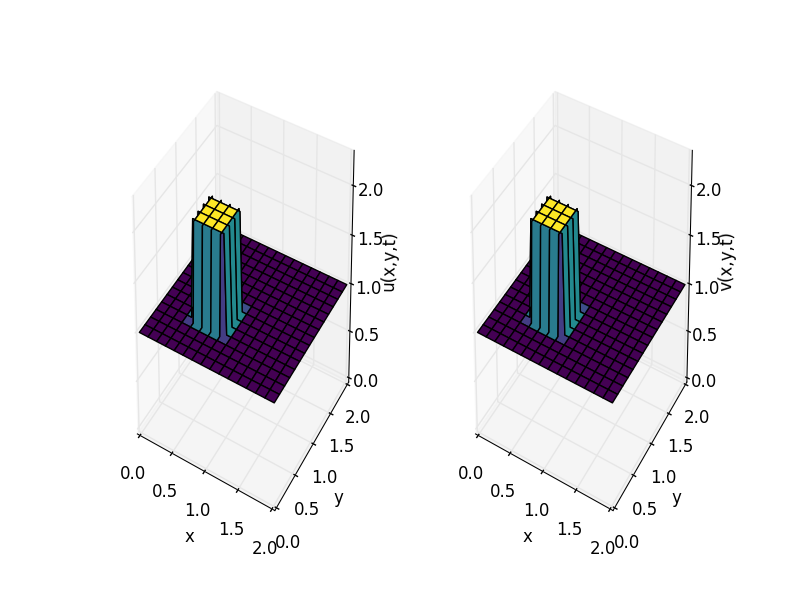

In [4]:
# plot initial configuration
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(8, 6), dpi=100, subplot_kw={'projection':'3d'})
# meshgrid
X, Y = np.meshgrid(x, y)
# u surface
usurf = ax1.plot_surface(X, Y, u[:], rstride=4, cstride=4, cmap='viridis')
ax1.set_xlim(0, Lx)         #set x limits of plot
ax1.set_ylim(0, Ly)         #set y limits of plot
ax1.set_zlim(0, 1.15*umax0) #set z limits of plot
ax1.set_xlabel('x')         #set x-axis label
ax1.set_ylabel('y')         #set y-axis label
ax1.set_zlabel('u(x,y,t)')  #set z-axis label
# v surface
vsurf = ax2.plot_surface(X, Y, v[:], rstride=4, cstride=4, cmap='viridis')
ax2.set_xlim(0, Lx)         #set x limits of plot
ax2.set_ylim(0, Ly)         #set y limits of plot
ax2.set_zlim(0, 1.15*umax0) #set z limits of plot
ax2.set_xlabel('x')         #set x-axis label
ax2.set_ylabel('y')         #set y-axis label
ax2.set_zlabel('v(x,y,t)')  #set z-axis label
plt.show()                  #show plot

<IPython.core.display.Javascript object>


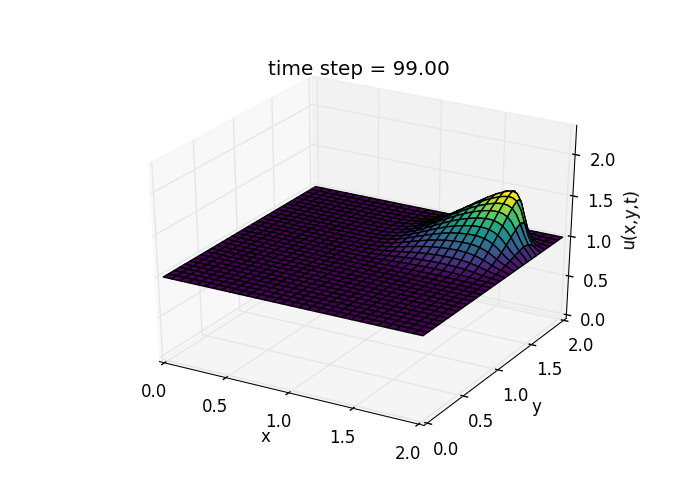

In [5]:
# function to update plot at each time step
def uplot(n, X, Y, u, ax):
    ax.cla()                   #clear previous plot
    ax.set_xlim(0, Lx)         #set x limits of plot
    ax.set_ylim(0, Ly)         #set y limits of plot
    ax.set_zlim(0, 1.15*umax0) #set z limits of plot
    ax.set_xlabel('x')         #set x-axis label
    ax.set_ylabel('y')         #set y-axis label
    ax.set_zlabel('u(x,y,t)')  #set z-axis label
    ax.set_title('time step = %.2f' % n) #set title to be current timestep
    ax.plot_surface(X, Y, u[:], rstride=2, cstride=2, cmap='viridis') #plot u vs x,y
    fig.canvas.draw()          #redraw figure

# create figure
fig = plt.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)

#plot initial configuration
uplot(0, X, Y, u, ax)

# solve
for n in range(1,nt):
    # copy solution from previous time step
    un = u.copy()
    vn = v.copy()
    # update solution at interior points
    u[1:,1:] = un[1:,1:] - dt/dx*un[1:,1:]*(un[1:,1:] - un[:-1,1:]) - dt/dy*vn[1:,1:]*(un[1:,1:] - un[1:,:-1])
    v[1:,1:] = vn[1:,1:] - dt/dx*un[1:,1:]*(vn[1:,1:] - vn[:-1,1:]) - dt/dy*vn[1:,1:]*(vn[1:,1:] - vn[1:,:-1])
    # update solution at boundary points
    u[ 0, :] = 1  #u at x=0
    u[-1, :] = 1  #u at x=L
    u[ :, 0] = 1  #u at y=0
    u[ :,-1] = 1  #u at y=L
    v[ 0, :] = 1  #v at x=0
    v[-1, :] = 1  #v at x=L
    v[ :, 0] = 1  #v at y=0
    v[ :,-1] = 1  #v at y=L

    # update plot
    uplot(n, X, Y, u, ax)